In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


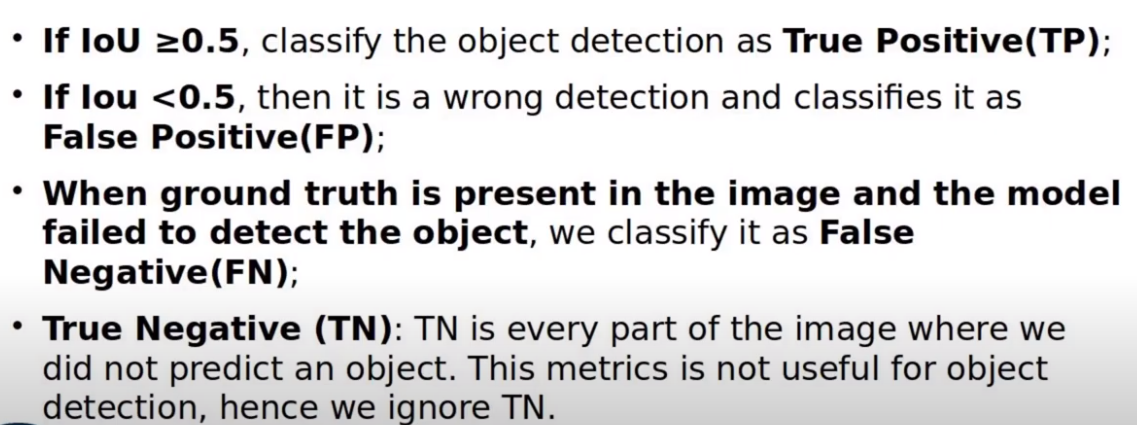

# **SETUP**

In [ ]:
%cd '/content/gdrive/My Drive/LIRMM/SETUP'

/content/gdrive/My Drive/LIRMM/SETUP


### 1- Separer en 4 les images

 (cut into tiles: fonction pour découper les grandes images en quatres petites images que j'appelle  'tiles')

In [ ]:
#!python ./script/cut_into_tiles.py ./ulm_base_3_Dugong_certain ./tiles/  'Dugong_certain'

### **2-** Choisir celles avec les dugong certains

 (-select tiles with presence: fonction pour ensuite sélectionner les tiles avec présence de dugong)

In [ ]:
#!python ./script/select_tiles_with_presence.py ./tiles/ ./tiles/presence/

### **3- Separate val train test**

proportion val, train and test

 input folder / train output folder / val output folder / test output folder

In [ ]:
!python ./script/split_images_into_independant_sets.py \
  0.60 0.20 0.20 \
 ./tiles/presence/ ./image_data/train/ ./image_data/val/ ./image_data/test/

### **4- txt to csv**

**for train set**

1er argument : input folder without '/' , 2ème argument fichier de sortie

In [ ]:
!python ./script/txt_to_csv.py ./image_data/train ./image_data/train/annotations_train.csv

**for val set**

1er argument : input folder without '/' , 2ème argument fichier de sortie

In [ ]:
!python ./script/txt_to_csv.py ./image_data/val ./image_data/val/annotations_val.csv

### **5- Image augmentation** 

*For training set*

1.   File created will be file_**aug**
2.   Number of augmentation
3.   output for YOLO images augmented (to train/images/train) 
4.   output for faster-rcnn images augmented 

labels go to directory ./image_data/train/**images_aug**/





In [ ]:
!python ./script/img_aug.py ./image_data/train/annotations_train.csv '_aug' 10 \
../Dugong_yolov5/train/images/train/ ../Dugong_faster-rcnn/image_data/train/

/usr
delete folder
delete folder
./image_data/train/GH033854_443_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033854_444_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033854_445_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023872_307_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023872_308_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023894_631_1352_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023894_611_1352_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023900_502_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033839_2_108_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033839_2_106_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033839_2_107_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033886_104_1352_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH033886_103_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023855_480_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/train/GH023821_101_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/tra

*Same for validation set*

In [ ]:
!python ./script/img_aug.py ./image_data/val/annotations_val.csv '_aug' 10 \
../Dugong_yolov5/train/images/val/ ../Dugong_faster-rcnn/image_data/val/

/usr
delete folder
delete folder
./image_data/val/GH020653_493_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_492_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_495_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_496_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_494_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_497_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_690_0_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_690_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_689_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_689_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_688_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH020653_688_0_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH033855_1_1352_760.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH033855_3_1352_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH033855_4_1352_0.jpeg
0
1
2
3
4
5
6
7
8
9
./image_data/val/GH033855_2_1352_760.jpeg
0
1
2
3
4


# FOR YOLO 


### **6- to yolo_format**

**Convert train label to yolo format**

from (590 697 647 748 Dugong_certain) to (0 0.28 0.525 0.022 0.05)

1st argument : input directory where labels are

2nd argument : output directory 

In [ ]:
!python ./script/to_yolo_label_format.py ./image_data/train/labels_aug/ \
 ../Dugong_yolov5/train/labels/train/

delete folder
finish copy


**Convert val label to yolo format**

In [ ]:
!python ./script/to_yolo_label_format.py ./image_data/val/labels_aug/ \
../Dugong_yolov5/train/labels/val/

delete folder
finish copy


# For Faster-RCNN

Compile text annotations to csv file for train dataset : pas obligé de relancer ! 

In [ ]:
!python ./script/txt_to_csv.py ../Dugong_faster-rcnn/image_data/train ../Dugong_faster-rcnn/deep/faster_rcnn_resnet101_coco_2018_01_28/data/annotations_train.csv

Compile text annotations to csv file for validation dataset : pas obligé de relancer ! 

In [ ]:
!python ./script/txt_to_csv.py ../Dugong_faster-rcnn/image_data/val ../Dugong_faster-rcnn/deep/faster_rcnn_resnet101_coco_2018_01_28/data/annotations_val.csv

***Generate record for train and validation dataset in the faster-rcnn file***